![HR Analytics](hr4.JPG)

#### XYZ Company is concerned about its rising attrition rates and wants to analyse the factors responsible for it. As a data analyst, my task is to explore the Employee Attrition dataset and generate useful insights from it. We will try to answer questions such as :
#### Q. What are factors affecting Job Satisfaction, Attrition and Income?
#### Q. Is there Gender Parity across different Roles and Departments?
#### Q. Who is more likely to leave the company?

#### The process will involve Exploratory Data Analysis of the dataset, followed by generating visualizations and producing required insights to answer the business questions.

-----

# EXPLORATORY ANALYSIS

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv("Attrition data.csv")

In [3]:
# checking the top 5 rows
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [6]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


In [7]:
# checking for null values
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [9]:
#replacing null values with respective column average
df['NumCompaniesWorked'].fillna(2, inplace=True)
df['EnvironmentSatisfaction'].fillna(3, inplace=True)
df['JobSatisfaction'].fillna(3, inplace=True)
df['WorkLifeBalance'].fillna(3, inplace=True)
df['TotalWorkingYears'].fillna(7, inplace=True)

In [11]:
# checking for duplicate values
df[df.duplicated()]

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating


In [12]:
# dropping irrelevant columns
df.drop(['EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [13]:
# transforming certain columns into ranges
df['Total Working Years Range'] = pd.cut(x=df['TotalWorkingYears'], bins=10, labels=['0-4','4-8','8-12','12-16','16-20','20-24','24-28','28-32','32-36','36-40'])
df['Years At Company Range'] = pd.cut(x=df['YearsAtCompany'], bins=10, labels=['0-4','4-8','8-12','12-16','16-20','20-24','24-28','28-32','32-36','36-40'])
df['Years Since Last Promotion Range'] = pd.cut(x=df['YearsSinceLastPromotion'], bins=5, labels=['0-3','3-6','6-9','9-12','12-15'])
df['Years with Current Manager Range'] = pd.cut(x=df['YearsWithCurrManager'], bins=[0,2,4,6,8,10,12,14,17], labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-17'])

In [14]:
#removing original columns
df.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1, inplace=True)

In [15]:
# renaming columns
df.rename(columns={'BusinessTravel':'Business Travel',
       'DistanceFromHome':'Distance From Home', 'EducationField':'Education Field',
       'EnvironmentSatisfaction':'Environment Satisfaction', 'JobInvolvement':'Job Involvement',
       'JobLevel':'Job Level', 'JobRole':'Job Role', 'JobSatisfaction':'Job Satisfaction', 'MaritalStatus':'Marital Status',
       'MonthlyIncome':'Monthly Income', 'NumCompaniesWorked':'Num Companies Worked',
       'PercentSalaryHike':'Percent Salary Hike', 'PerformanceRating':'Performance Rating',
       'StockOptionLevel':'Stock Option Level', 'TrainingTimesLastYear':'Training Times Last Year', 'WorkLifeBalance':'Work Life Balance', 'Total Working Years Range':'Total Working Years', 'Years At Company Range':'Years At Company', 
        'Years Since Last Promotion Range':'Years Since Last Promotion', 
       'Years with Current Manager Range':'Years with Current Manager'}, inplace=True)

<br>

---

<br>

# 1. ANALYSING JOB SATISFACTION

In [16]:
#defining list of variables to be visualized
jobs1 = ['Distance From Home', 'Education', 'Environment Satisfaction',
       'Job Involvement', 'Job Level',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
        'Stock Option Level',
       'Training Times Last Year', 'Work Life Balance', 'Total Working Years',
       'Years At Company',
       'Years Since Last Promotion', 'Years with Current Manager']

In [17]:
jobs2 = ['Attrition', 'Business Travel', 'Department',
       'Gender', 'Marital Status']

## Q. What are the factors affecting Job Satisfaction?

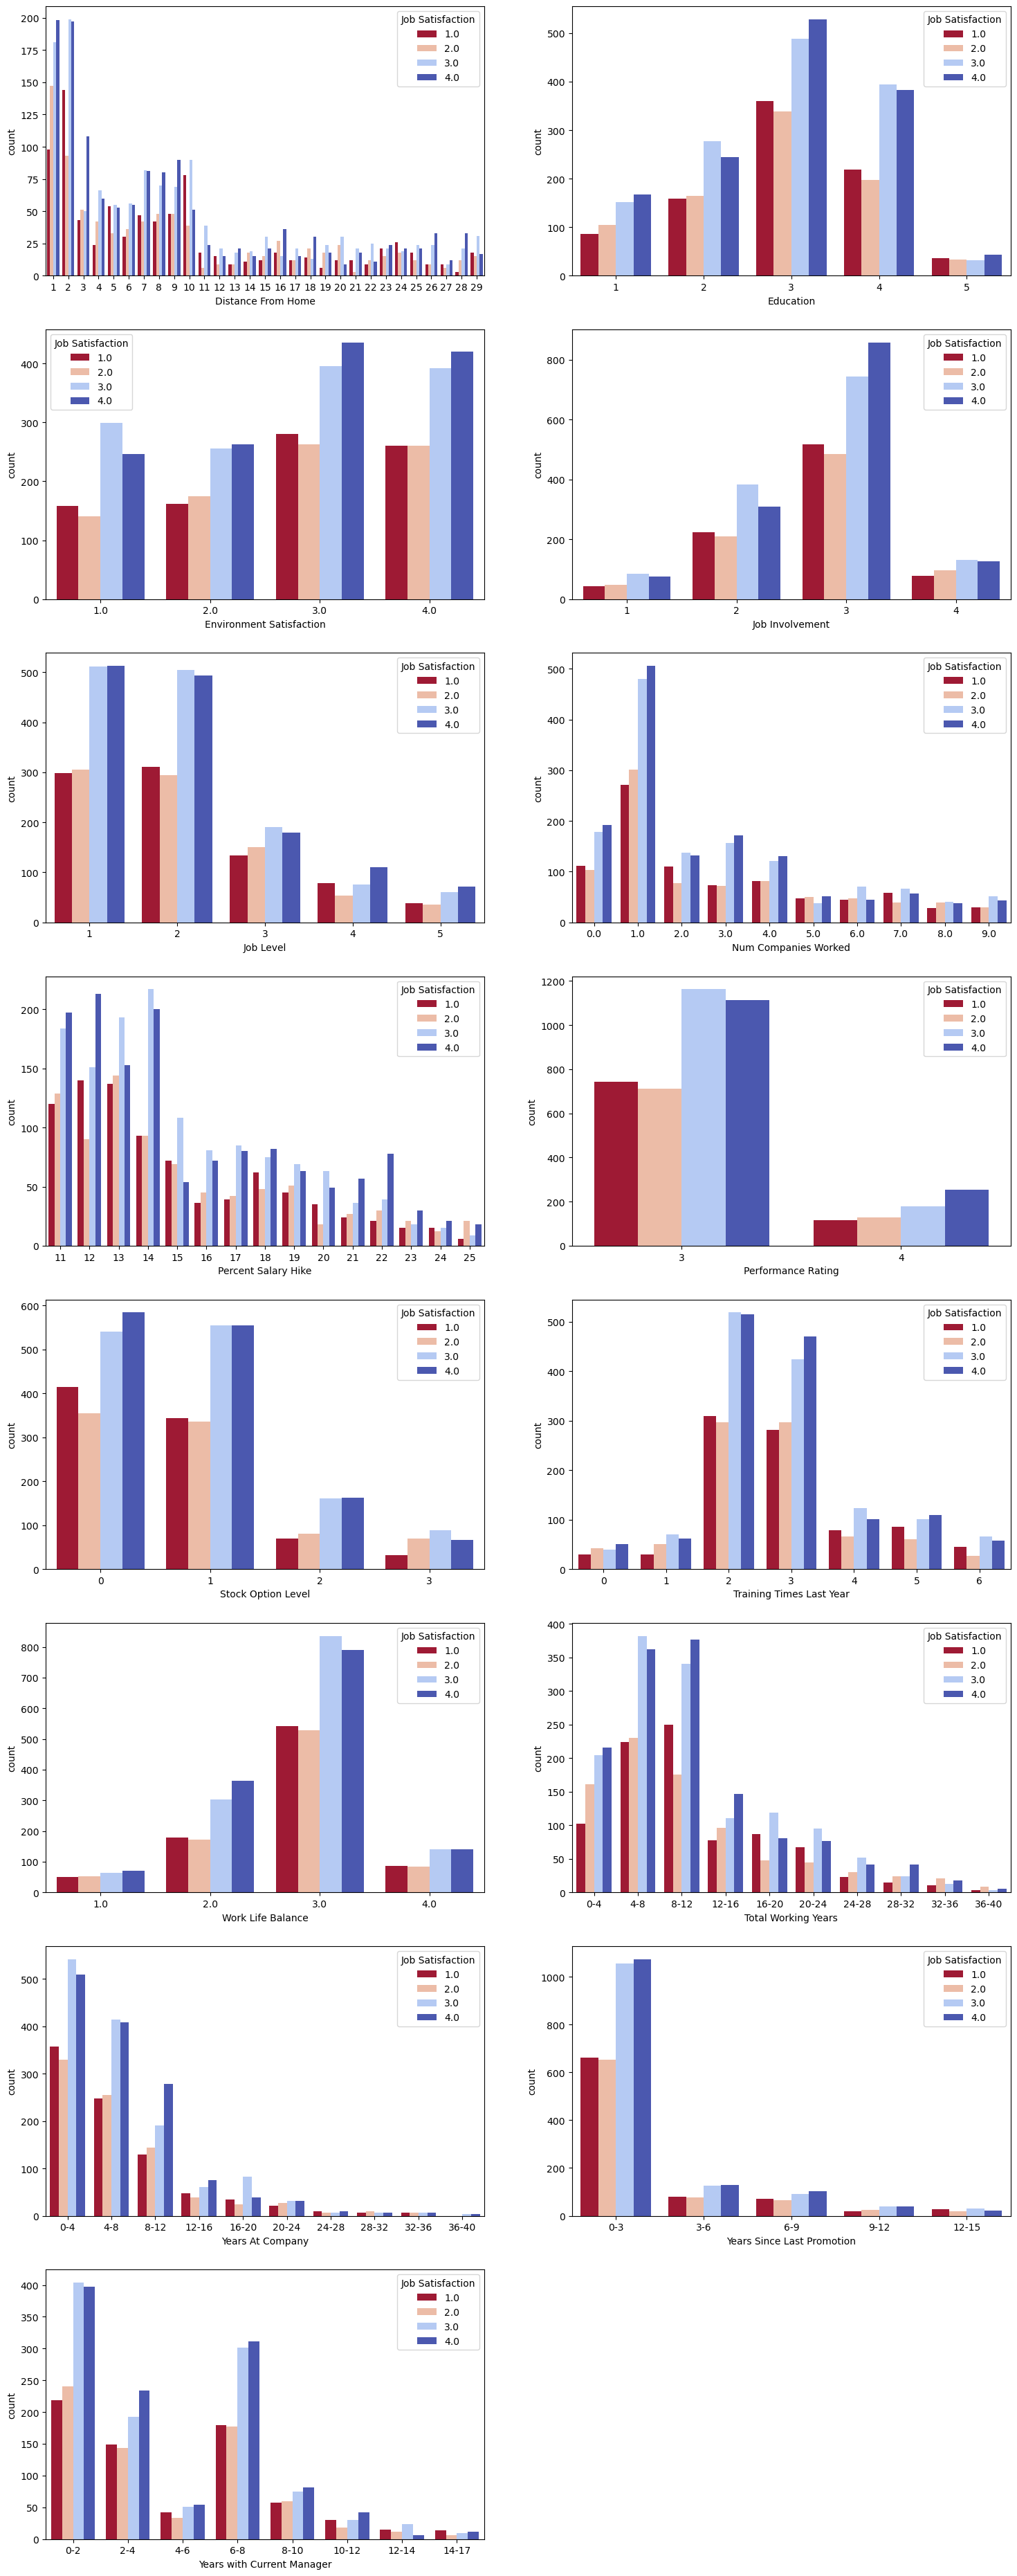

In [18]:
plt.figure(figsize=(18,90))
for i,col in enumerate(jobs1):
    axes = plt.subplot(15,2, i + 1)
    sns.countplot(x=df[col], hue='Job Satisfaction', data=df, palette='coolwarm_r')
plt.show()

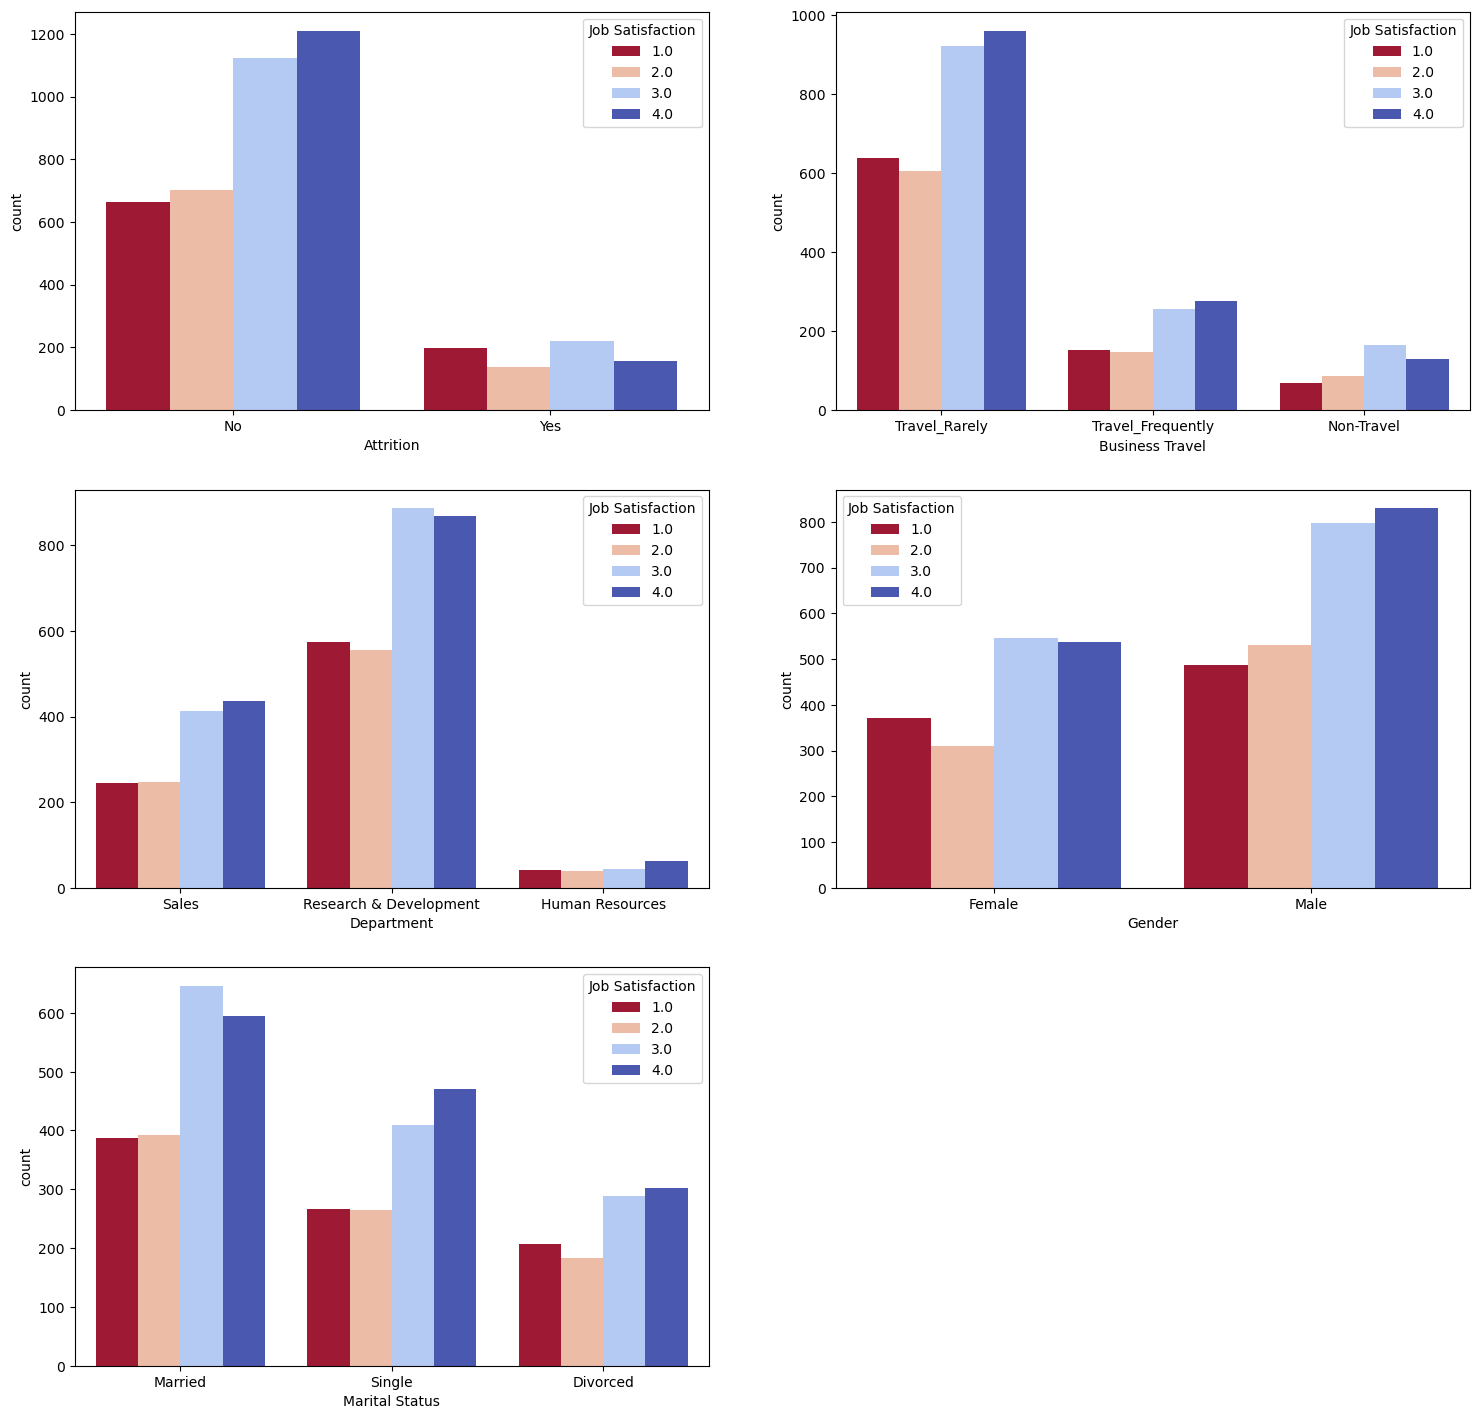

In [19]:
plt.figure(figsize=(18,30))
for i,col in enumerate(jobs2):
    axes = plt.subplot(5,2, i + 1)
    sns.countplot(x=df[col], hue='Job Satisfaction', data=df, palette='coolwarm_r')
plt.show()

#### <font color=green>Insight : There is more job satisfaction in the Research & Development department and among Males.</font>

<br>

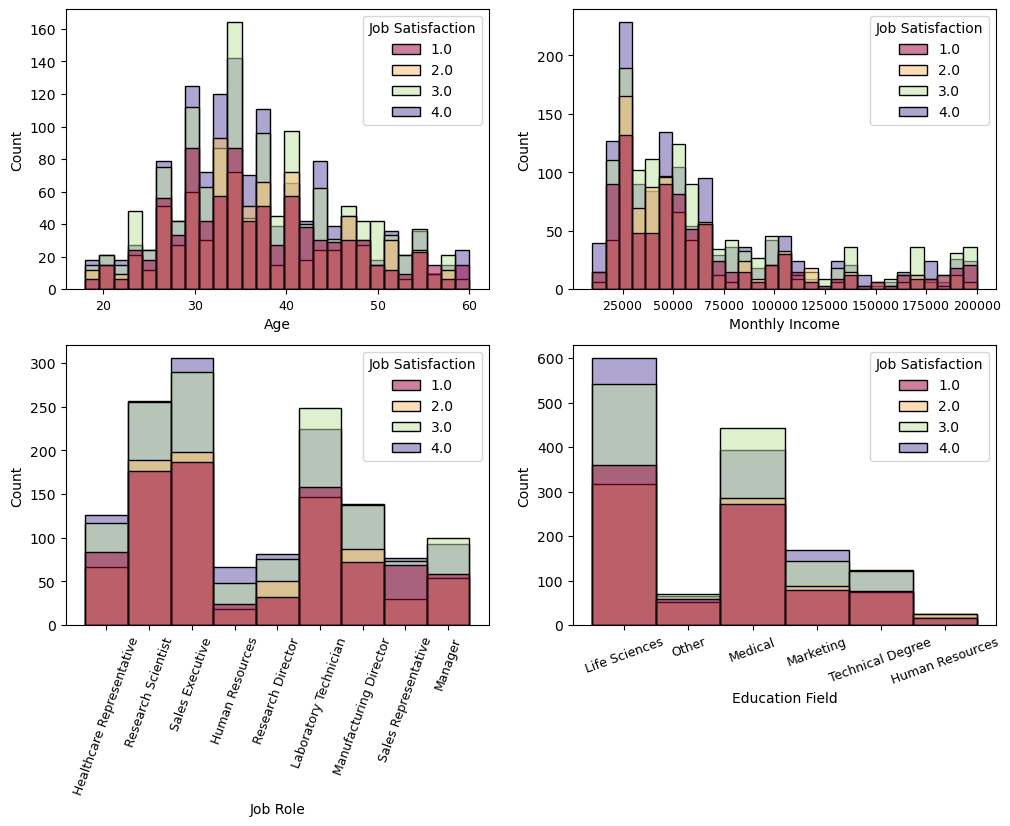

In [20]:
# Plotting Job Satisfaction by Age, Income, Job Role and Education

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
ax = sns.histplot(x='Age', hue='Job Satisfaction', data=df, palette='Spectral')
ax.set_xticks([20,30,40,50,60])
plt.xticks(fontsize=9)

plt.subplot(2,2,2)
sns.histplot(x='Monthly Income', hue='Job Satisfaction', data=df, palette='Spectral')
plt.xticks(fontsize=9)

plt.subplot(2,2,3)
sns.histplot(x='Job Role', hue='Job Satisfaction', data=df, palette='Spectral')
plt.xticks(rotation=70, fontsize=9)

plt.subplot(2,2,4)
sns.histplot(x='Education Field', hue='Job Satisfaction', data=df, palette='Spectral')
plt.xticks(rotation=20, fontsize=9)

plt.show()

<br>

-------

<br>

# ANALYSING ATTRITION

In [21]:
#defining list of variables to be visualized
attrition1 = ['Distance From Home', 'Education', 'Environment Satisfaction',
       'Job Involvement', 'Job Level', 'Job Satisfaction',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Stock Option Level',
       'Training Times Last Year', 'Work Life Balance', 'Total Working Years',
       'Years At Company',
       'Years Since Last Promotion', 'Years with Current Manager']

In [22]:
attrition2 = ['Business Travel', 'Department', 'Education Field',
       'Gender', 'Marital Status']

## Q. What are the factors affecting Attrition?

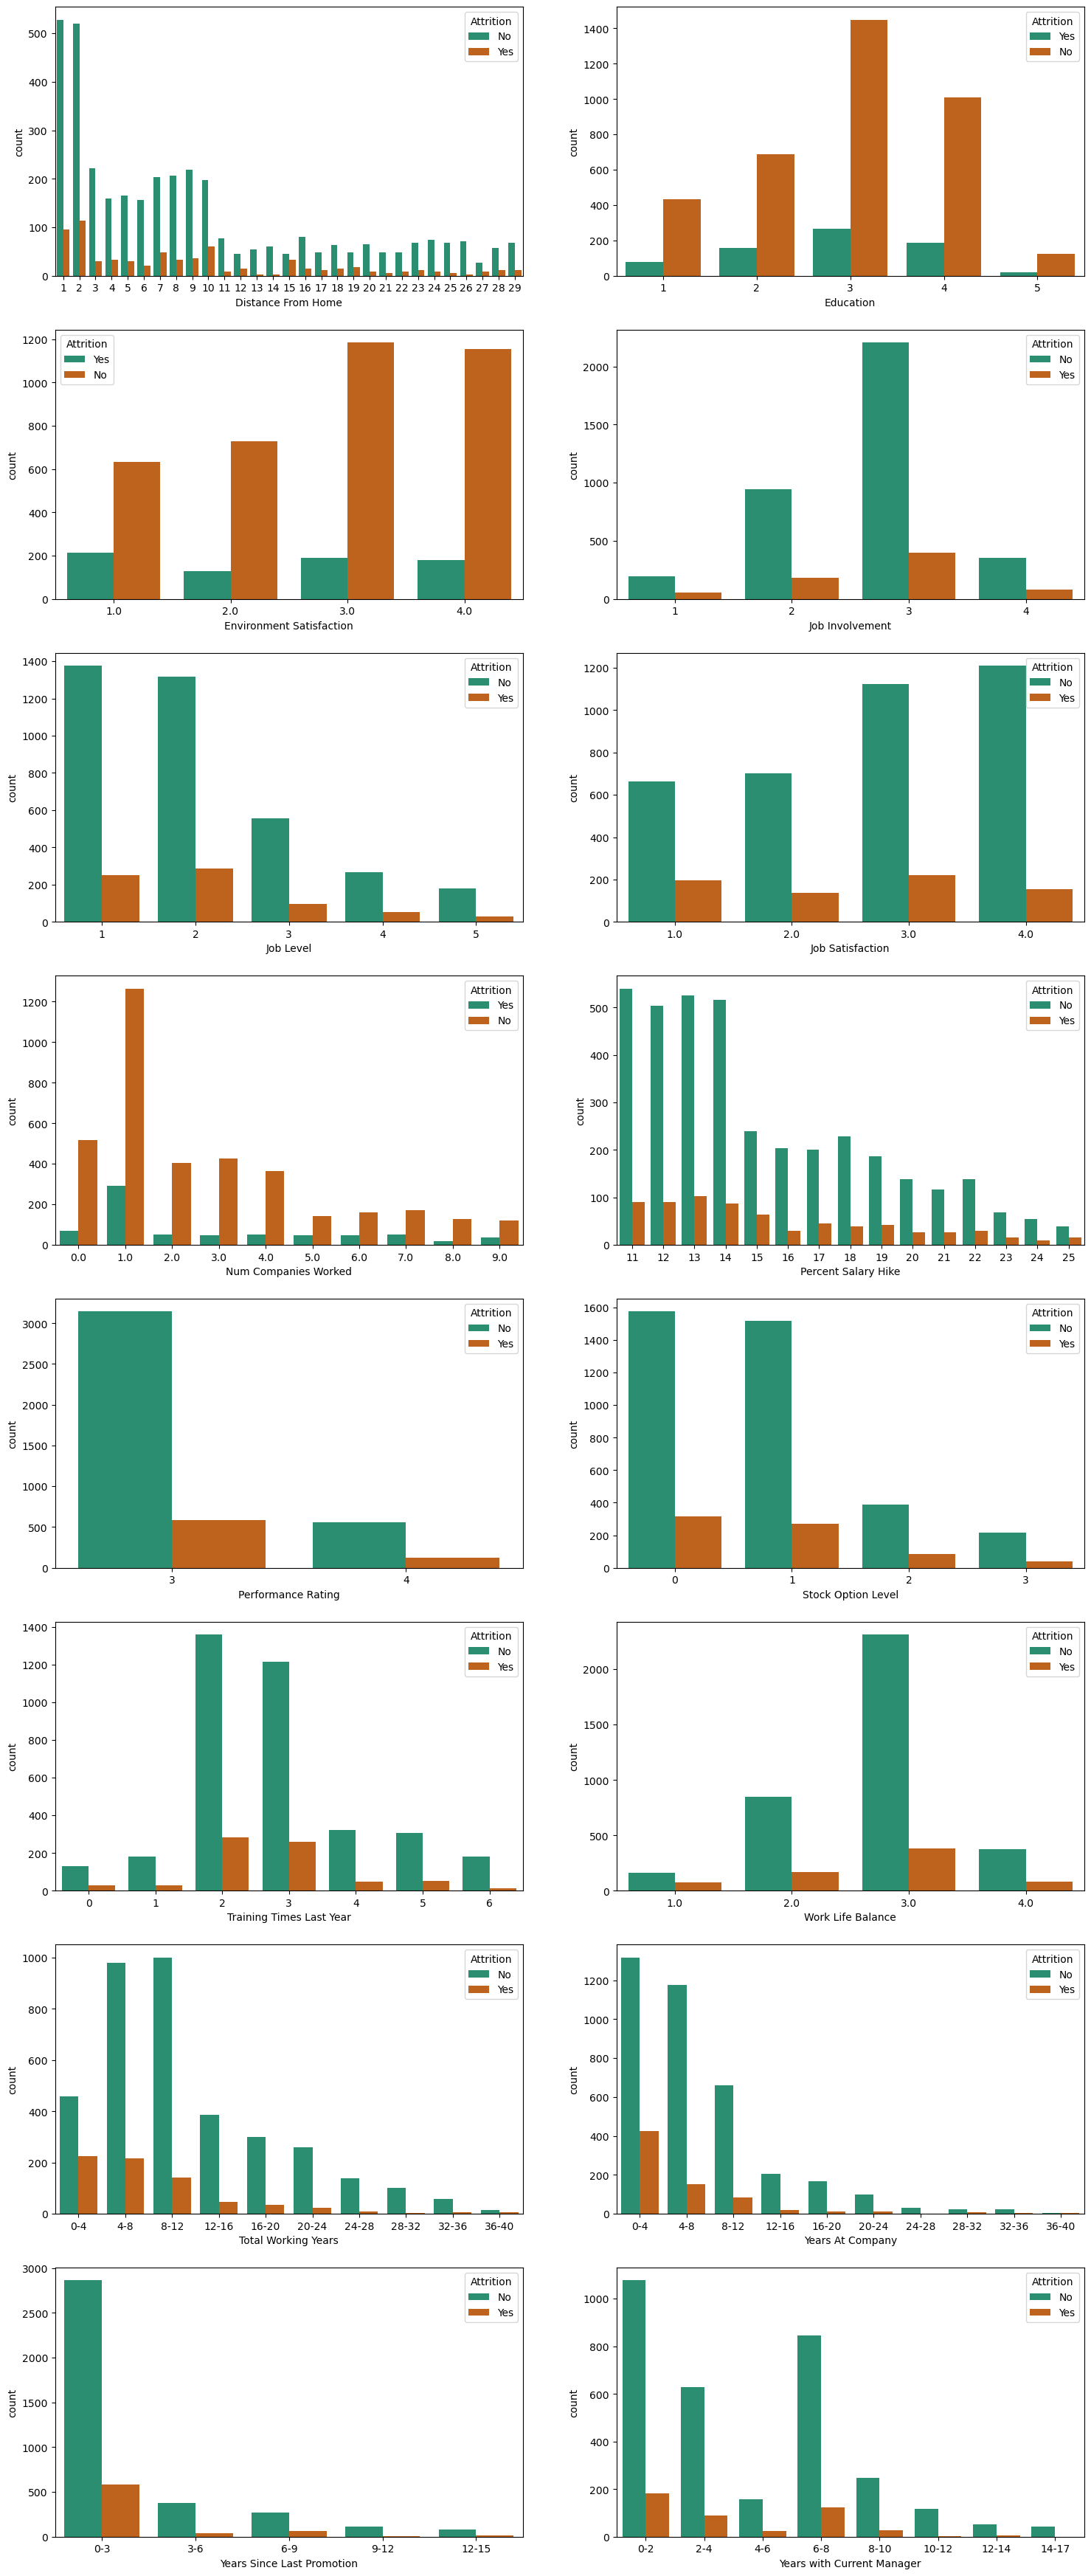

In [23]:
plt.figure(figsize=(18,90))
for i,col in enumerate(attrition1):
    axes = plt.subplot(16,2, i + 1)
    sns.countplot(x=df[col], hue='Attrition', data=df, palette='Dark2')
plt.show()

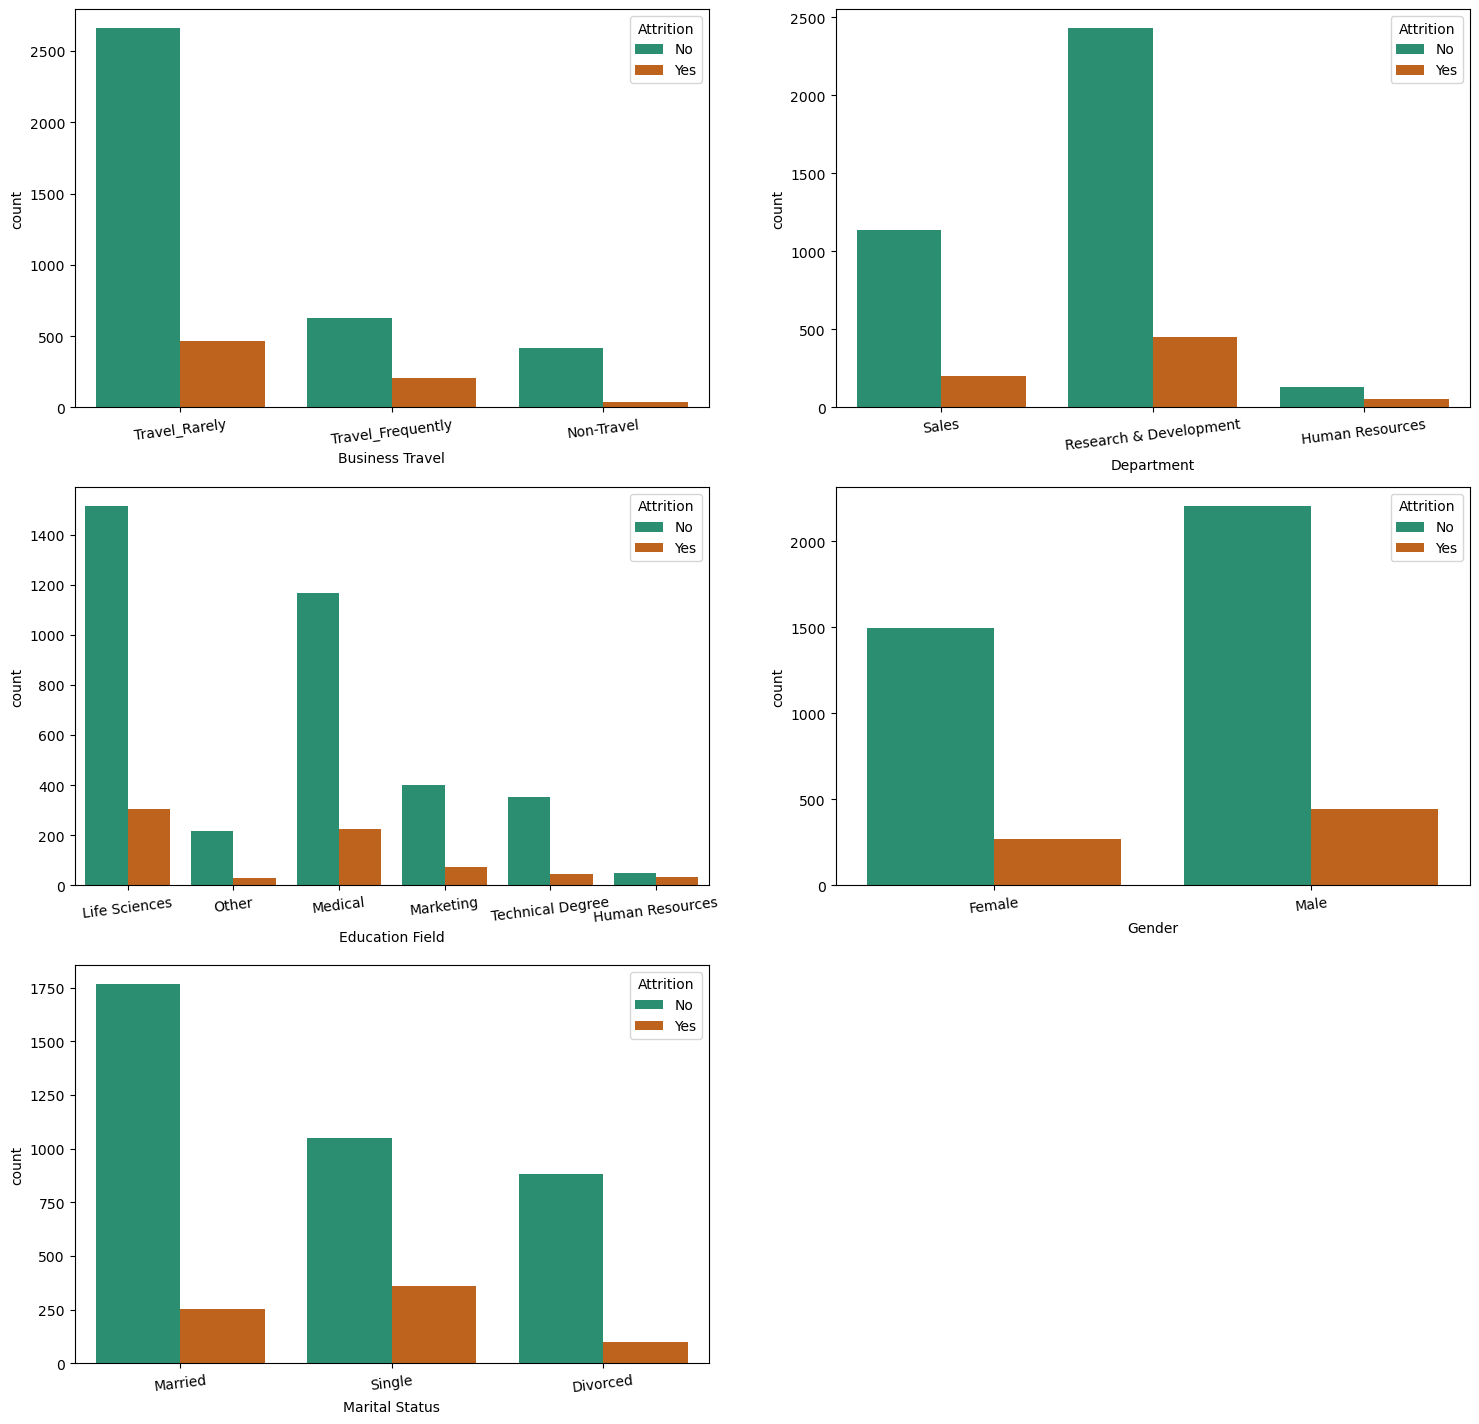

In [24]:
plt.figure(figsize=(18,30))
for i,col in enumerate(attrition2):
    axes = plt.subplot(5,2, i + 1)
    sns.countplot(x=df[col], hue='Attrition', data=df, palette='Dark2')
    plt.xticks(rotation=7)
plt.show()

#### <font color=green> Insight : In terms of education, Life Sciences and Medical see the highest attrition. Single employees are more likely to leave as compared to married and divorced employees. In absolute numbers, a male employee is more likely to quit than a female employee. </font>

<br>

## Attrition by Income, Age and Job Role

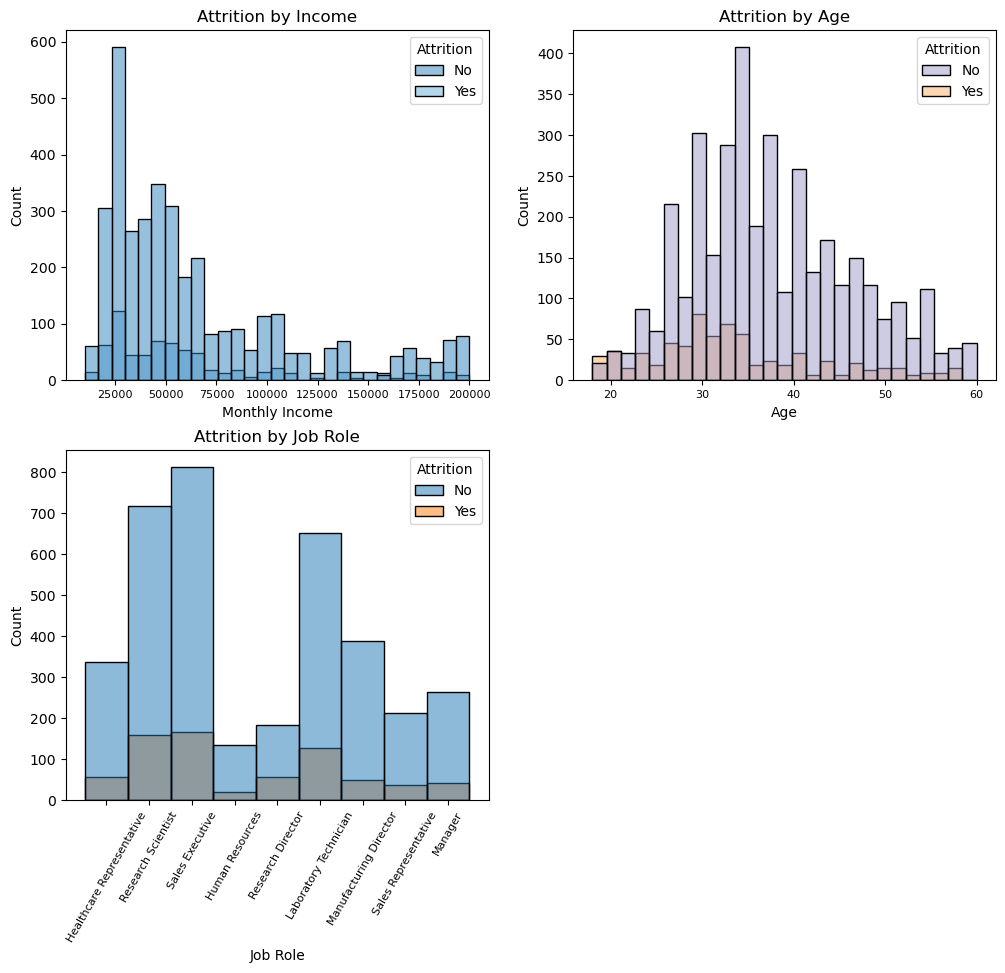

In [25]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(x='Monthly Income', hue='Attrition', data=df, palette='tab20c')
plt.title("Attrition by Income")
plt.xticks(fontsize=8)

plt.subplot(2,2,2)
sns.histplot(x='Age', hue='Attrition', data=df, palette='tab20c_r')
plt.title("Attrition by Age")
plt.xticks(fontsize=8)

plt.subplot(2,2,3)
sns.histplot(x='Job Role', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=60, fontsize=8)

plt.show()

#### <font color=green>Insight : There is more attrition among employess who are between the ages of 25-35 and whose salaries are less than 5000. Highest absolute attrition is in the roles of Sales Executive, Research Scientist and Laboratory Technician. The highest relative attrition is in the roles of Sales Representative & Human Resources. The lowest attrition is in the Manager position.</font>

<br>

---

<br>

# INCOME ANALYSIS

In [26]:
# defining list of variables to be visualized
income1 = ['Distance From Home', 'Education', 'Environment Satisfaction',
       'Job Involvement', 'Job Level', 'Job Satisfaction',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Stock Option Level',
       'Training Times Last Year', 'Work Life Balance','Total Working Years',
       'Years At Company',
       'Years Since Last Promotion', 'Years with Current Manager']

In [27]:
income2 = ['Attrition', 'Business Travel', 'Department', 'Gender', 'Marital Status']

## Q. What are the factors affecting Income?

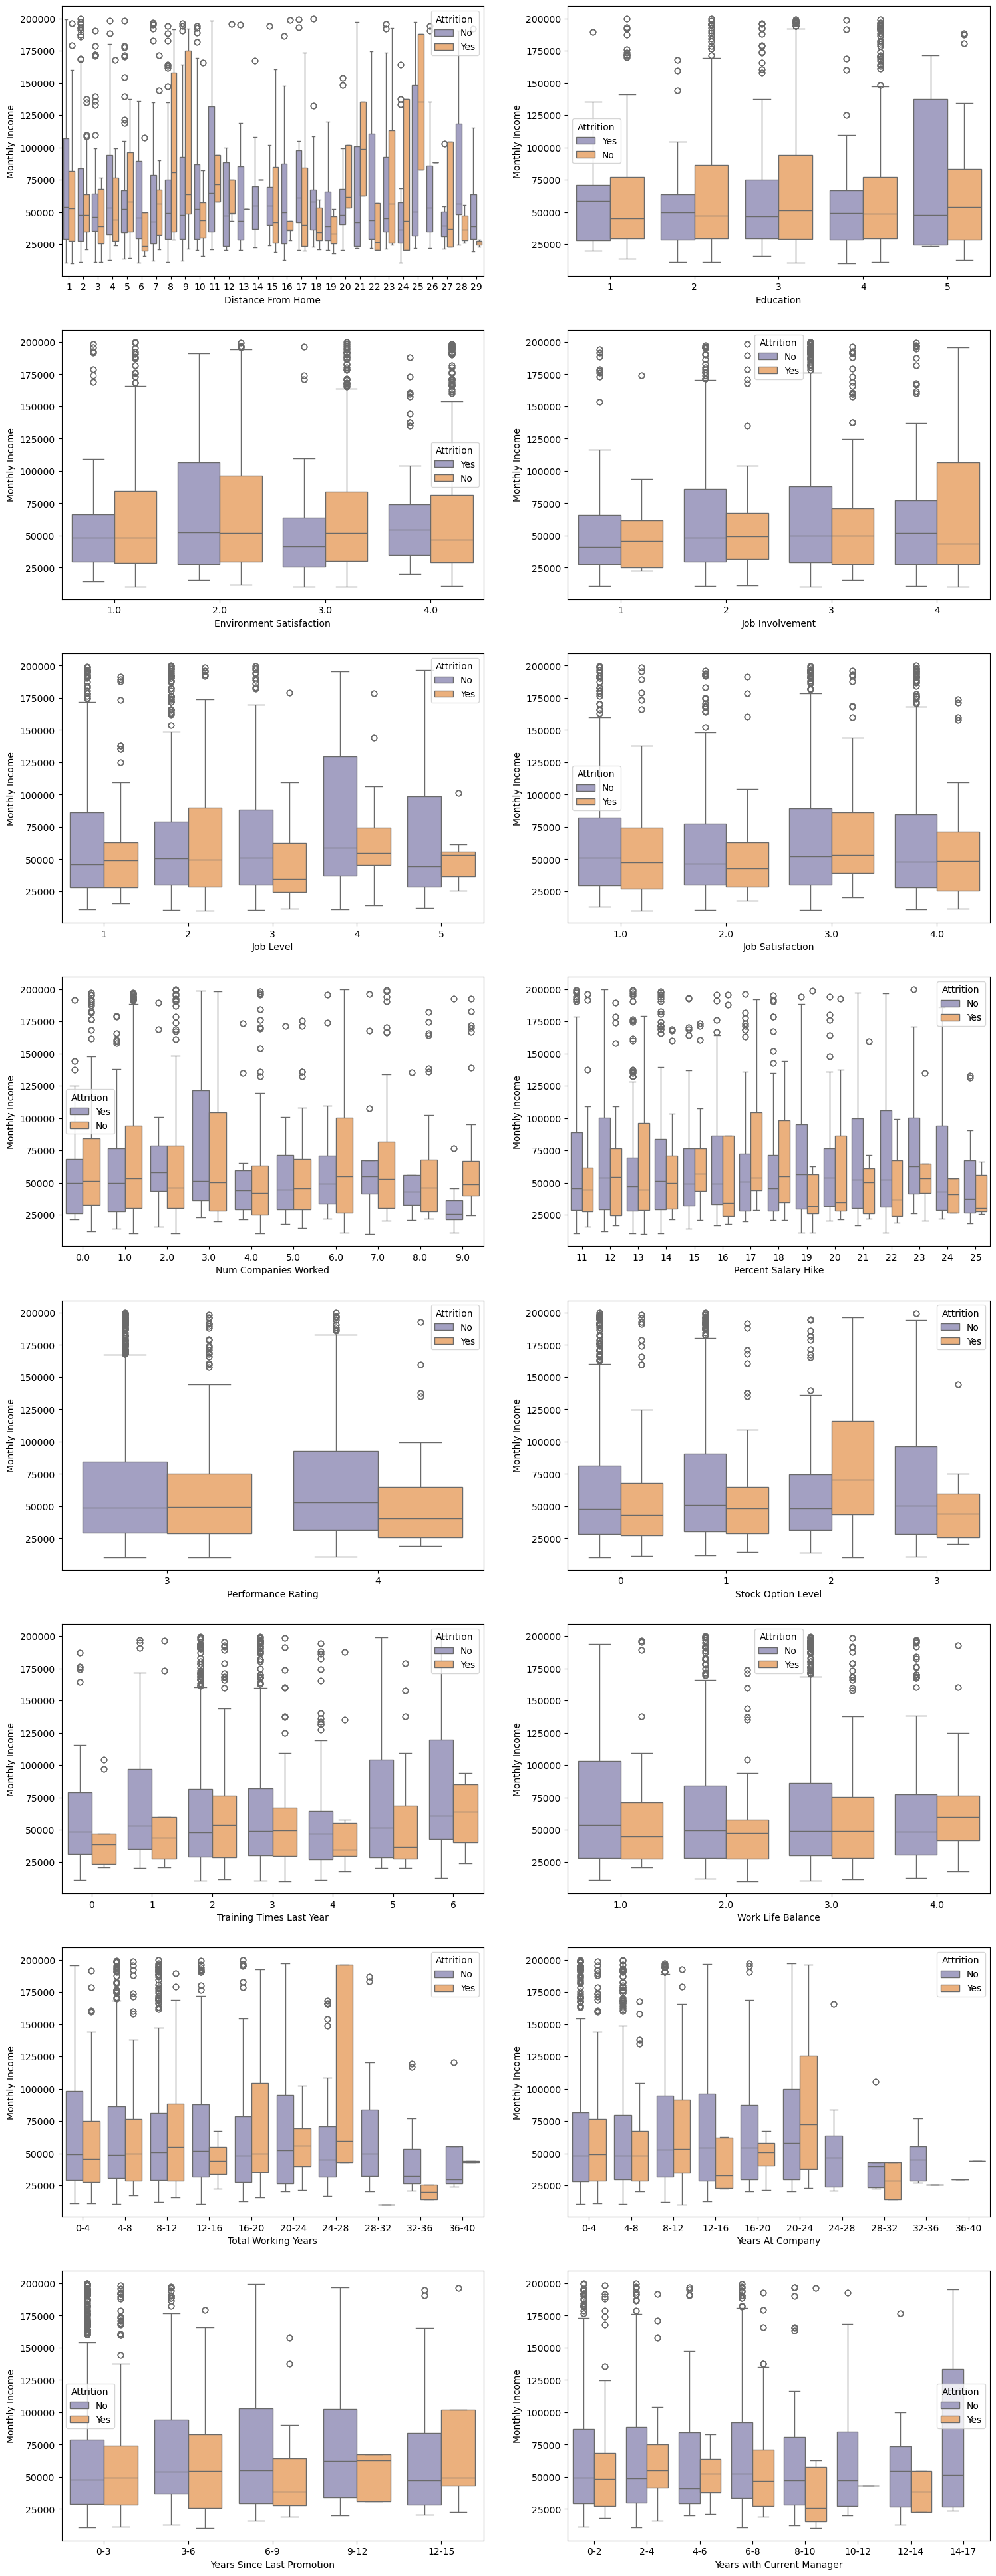

In [28]:
plt.figure(figsize=(18,100))
for i,col in enumerate(income1):
    axes = plt.subplot(16,2, i + 1)
    sns.boxplot(x=df[col], y='Monthly Income', hue='Attrition', data=df, palette='tab20c_r')
plt.show()

#### <font color=green>Insight : At the same Education, Performance Rating or Job Satisfaction level, the ones with lower income are more likely to leave.</font>

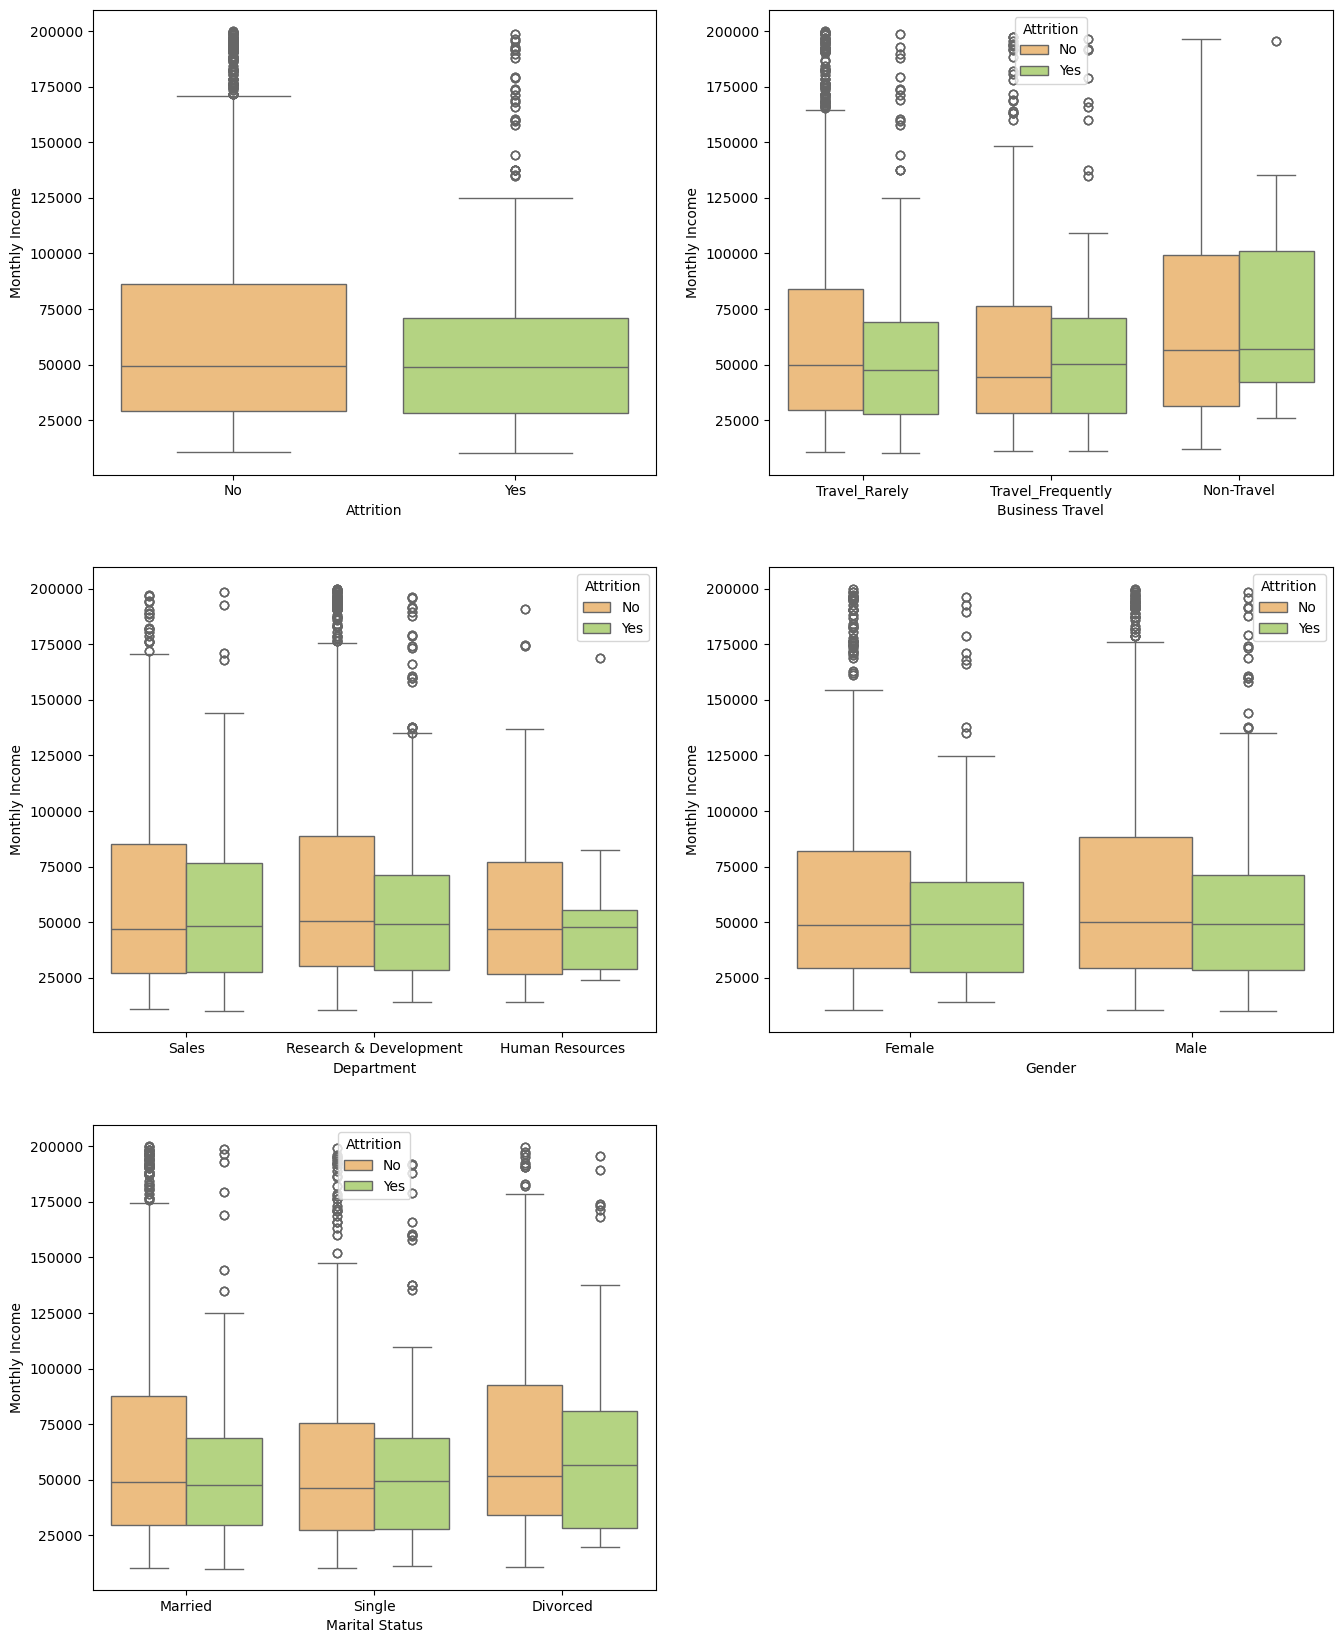

In [29]:
plt.figure(figsize=(16,35))
for i,col in enumerate(income2):
    axes = plt.subplot(5,2, i + 1)
    sns.boxplot(x=df[col], y='Monthly Income', hue='Attrition', data=df, palette='RdYlGn')
plt.show()

#### <font color=green>Insight : Across Departments, Gender, Travel Status and other dimensions, Income disparity plays a big role in the likelihood of Attrition.</font>

<br>

------------------------------------------------------------------------------------------------------------

<br>

# GENDER ANALYSIS

### Gender Distribution Profile

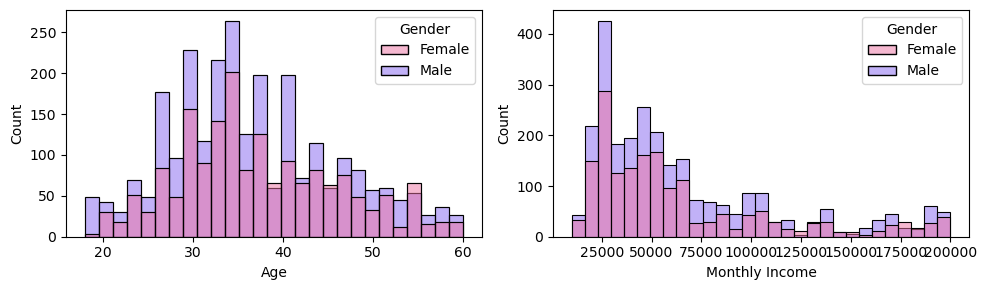

In [30]:
factors = ['Age','Monthly Income']

plt.figure(figsize=(10,3))
for i,col in enumerate(factors):
    axes = plt.subplot(1,2, i + 1)
    sns.histplot(x=df[col], hue=df['Gender'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

#### <font color=green>Insight : Across Age and Income Range, the number of female employees is less than the number of male employees.</font>

----

### Gender Disparity across Age, Education & Job Role

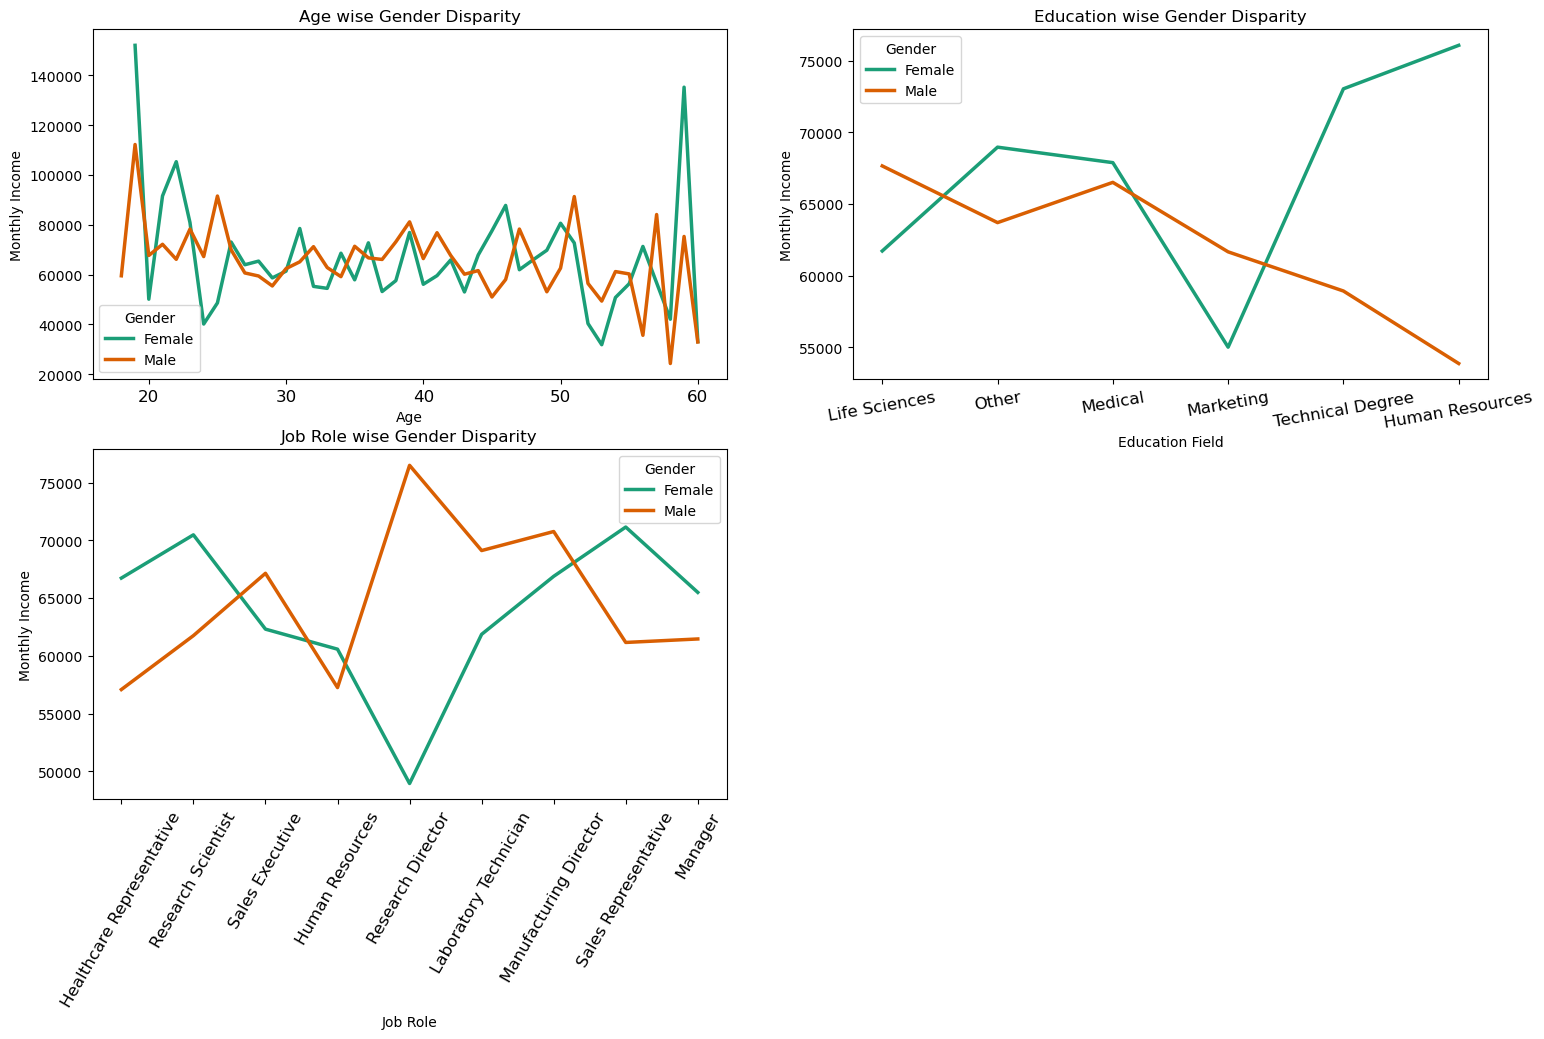

In [31]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.lineplot(x='Age', y='Monthly Income', hue='Gender', data=df, palette='Dark2', linewidth=2.5, ci=None)
plt.title("Age wise Gender Disparity")
plt.xticks(fontsize=12)

plt.subplot(2,2,2)
sns.lineplot(x='Education Field', y='Monthly Income', hue='Gender', data=df, palette='Dark2', linewidth=2.5, ci=None)
plt.title("Education wise Gender Disparity")
plt.xticks(rotation=10, fontsize=12)

plt.subplot(2,2,3)
sns.lineplot(x='Job Role', y='Monthly Income', hue='Gender', data=df, palette='Dark2', linewidth=2.5, ci=None)
plt.title("Job Role wise Gender Disparity")
plt.xticks(rotation=60, fontsize=12)

plt.show()

#### <font color=green>Insight : With degrees in Marketing, Technical and Human Resources there is significant gap in the incomes of Males vis a vis Females.</font>

<br>

## Exploring Gender Wise Attrition Across Departments

<Figure size 1200x1000 with 0 Axes>

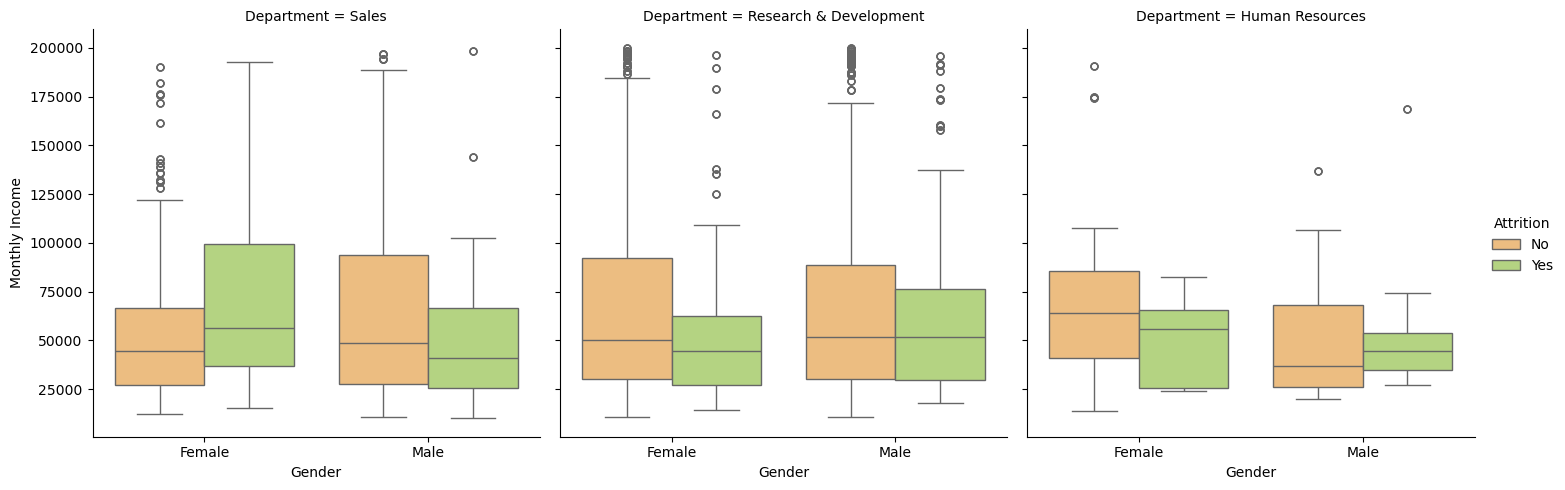

In [32]:
plt.figure(figsize=(12,10))
sns.catplot(x='Gender', y='Monthly Income', hue='Attrition', col='Department', kind='box', data=df, palette='RdYlGn')
plt.show()

#### <font color=green>Insight : Across departments, employees with lower income prefer to leave.</font>

<br>

-----

<br>

# CONCLUSION

<font color=teal>
<b>Job Satisfaction</b>
    - There is more job satisfaction in the Research & Development department and among Males. The lowest Job Satisfaction is in the Human Resources department.
</font>

<font color=teal>

<b> Attrition </b>
   - Education : In terms of education, Life Sciences and Medical see the highest attrition.
   - Marital Status : Single employees are more likely to leave as compared to married and divorced employees.
   - Gender : In absolute numbers, a male employee is more likely to quit than a female employee.
   - Age : There is more attrition among employess who are between the ages of 25-35 and whose salaries are less than 5000.
   - Job Role : Highest absolute attrition is in the roles of Sales Executive, Research Scientist and Laboratory Technician. The highest relative attrition is in the roles of Sales Representative & Human Resources. The lowest attrition is in the Manager position.
   - Income Impact : At the same Education, Performance Rating or Job Satisfaction level, the ones with lower income are more likely to leave. Across Departments, Gender, Travel Status and other dimensions, Income disparity plays a big role in the likelihood of Attrition.
       </font>

<font color=teal>
<b> Gender </b>
    (1) Across Age and Income Range, the number of female employees is less than the number of male employees.
    (2) With degrees in Marketing, Technical and Human Resources there is significant gap in the incomes of Males vis a vis Females.
    (3) Across departments, employees with lower income prefer to leave.
</font>